In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [23]:
dataset = pd.read_csv(r"/Users/princegupta/Documents/data science/dataset/Social_Network_Ads.csv")

In [24]:
dataset.head(3)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0


In [25]:
dataset.head(3)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0


In [26]:
from sklearn.preprocessing import FunctionTransformer

In [27]:
ft=FunctionTransformer(func=np.log1p)
ft.fit(dataset[["EstimatedSalary"]])

FunctionTransformer(func=<ufunc 'log1p'>)

In [28]:
dataset["EstimatedSalary"]=ft.transform(dataset[["EstimatedSalary"]])

In [29]:
dataset.head(3)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,9.852247,0
1,15810944,Male,35,9.903538,0
2,15668575,Female,26,10.668979,0


In [30]:
dataset.drop(columns=["User ID","Gender"],inplace=True)

In [61]:
dataset.head(10)

,Age,EstimatedSalary,Purchased
0,19,9.852247,0
1,35,9.903538,0
2,26,10.668979,0
3,27,10.950824,0
4,19,11.238502,0
5,27,10.968216,0
6,27,11.338584,0
7,32,11.918397,1
8,25,10.404293,0
9,35,11.082158,0


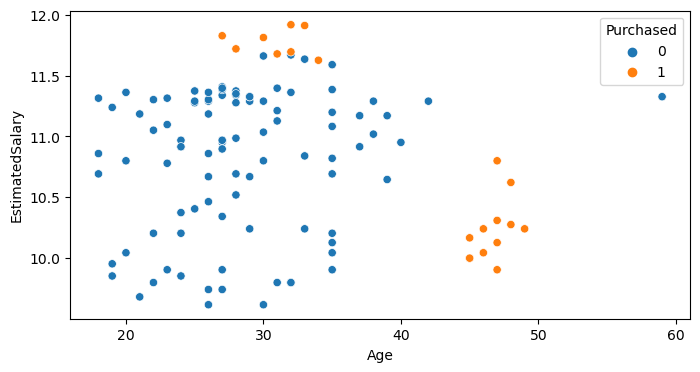

In [33]:
plt.figure(figsize=(8,4))
sns.scatterplot(x="Age",y="EstimatedSalary",data=dataset,hue="Purchased")
plt.show()

In [34]:
x=dataset.iloc[:,:-1]
y=dataset["Purchased"]

In [43]:
from sklearn.preprocessing import PolynomialFeatures

In [46]:
pf=PolynomialFeatures(degree=3)
pf.fit(x)
x=pd.DataFrame(pf.transform(x))

In [47]:
type(x)

pandas.core.frame.DataFrame

In [49]:
x.columns

RangeIndex(start=0, stop=10, step=1)

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [52]:
x_train.shape,y_train.shape

((92, 10), (92,))

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

/Users/princegupta/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [56]:
lr.score(x_test,y_test)*100

100.0

In [57]:
from mlxtend.plotting import plot_decision_regions

In [59]:
test=pf.transform([[19,9.8]])

/Users/princegupta/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [60]:
lr.predict(test)

array([0])

In [62]:
test1=pf.transform([[32,11.9]])

/Users/princegupta/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [63]:
lr.predict(test1)

array([1])